In [3]:
                                                                                            # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies/movies.csv


**Box Office Earning Analysis** 

For this project dataset has been imported from Kaggle repository - "Movie Industry". 

In [4]:
# Importing Libraries that we will be using in our Analysis

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #This attribute ajusts the configurations
# of plots that we create



In [5]:
# Reading Data 

mv_data = pd.read_csv('/kaggle/input/movies/movies.csv')
mv_data.head(5)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

**Data Cleaning**

In [6]:
# Finding missing data
for col in mv_data.columns:
    percent_missing = np.mean(mv_data[col].isnull())
    print('{} - {}%'.format(col,percent_missing))
                                
#Also we can use :                      
mv_data.isnull().any()

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [7]:
#For now,we are fixing all null values by replacing them with 0 for numerical values and "null" for alphabaetical values
#Checking Data types and converting data types
mv_data.dtypes
mv_data = mv_data.astype({'budget':'Int64','gross': 'Int64', 'votes': 'Int64', 'released': 'object'})

In [8]:
# Setting value as '0' for all alphabetical nulls 
for column in mv_data.columns:
    if mv_data[column].dtype == 'Int64':
        mv_data = mv_data.fillna(0)
        
        # Setting value as 'NaN' for all alphabetical nulls 
for column in mv_data.columns:
    if mv_data[column].dtype == 'object':
        mv_data = mv_data.fillna('NaN')

In [9]:
mv_data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         Int64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object

In [10]:
# Checking again for Finding missing data
for col in mv_data.columns:
    percent_missing = np.mean(mv_data[col].isnull())
    print('{} - {}%'.format(col,percent_missing))
    
mv_data.isnull().any()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


name        False
rating      False
genre       False
year        False
released    False
score       False
votes       False
director    False
writer      False
star        False
country     False
budget      False
gross       False
company     False
runtime     False
dtype: bool

*All Nulls fixed*

In [11]:
mv_data.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [12]:
#Splitting the Column released in the 'Released_Country' column
mv_data[['Release_Date', 'Release_Country']] = mv_data['released'].str.split("(", expand=True)
mv_data['Release_Country'] = mv_data['Release_Country'].str.replace(")",'')
mv_data.head()

#dropping redundant columns
#mv_data.drop(['Release_date','released'], axis=1,inplace=True)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime    Release_Date Release_Country  
0   46998772        Warner Bros.    146.0  June 13, 1980    United States  
1   58853106   Columbia Pictures    104.0   July 2, 1980    United States  
2  538375067           Lucasfilm    124.0  June 20, 1980    United States  
3   83453539  Paramount Pictures     88.0   July 2, 1980    United States  
4   39846344      Orion Pictures     98.0  July 25, 1980    United States

In [13]:
# Changing numeber of rwos displayed for each result 
# to increase data readibilty

pd.set_option('display.max_rows', None)
# Note: Data may take a while to load beacuse we are pulling entire data.

#creating a new column for percentage profit earned by a movie with respect to its budget
# this gives us the BEST performing movies
mv_data['Percent_profit']= (mv_data['gross']/mv_data['budget'])*100
mv_data.head()

# Sorting data on column 'gross' in descending order
mv_data.sort_values(by=['gross'], inplace = False, ascending = False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [14]:
# Finding any Duplicates if present
mv_data[mv_data.duplicated()]

mv_data1 = mv_data[(mv_data.budget != 0.0) & mv_data.gross != 0.0]


***Finding Corealtion in our Data***

In [15]:
mv_data.corr(numeric_only=True)

year     score     votes    budget     gross   runtime  \
year            1.000000  0.092616  0.222427  0.309212  0.261900  0.116358   
score           0.092616  1.000000  0.407101  0.056863  0.186012  0.394564   
votes           0.222427  0.407101  1.000000  0.486931  0.632870  0.306984   
budget          0.309212  0.056863  0.486931  1.000000  0.750157  0.268372   
gross           0.261900  0.186012  0.632870  0.750157  1.000000  0.244339   
runtime         0.116358  0.394564  0.306984  0.268372  0.244339  1.000000   
Percent_profit  0.007740  0.004368  0.017746 -0.017765  0.016499 -0.023939   

                Percent_profit  
year                  0.007740  
score                 0.004368  
votes                 0.017746  
budget               -0.017765  
gross                 0.016499  
runtime              -0.023939  
Percent_profit        1.000000

[Text(0.5, 1.0, 'Correlation for Data')]

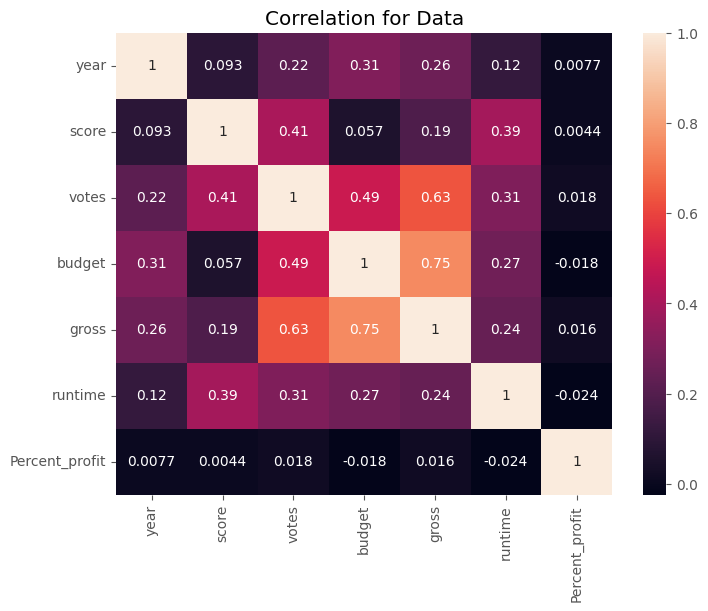

In [16]:
Corr_matrix  = mv_data.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(Corr_matrix,annot =  True).set(title ="Correlation for Data")

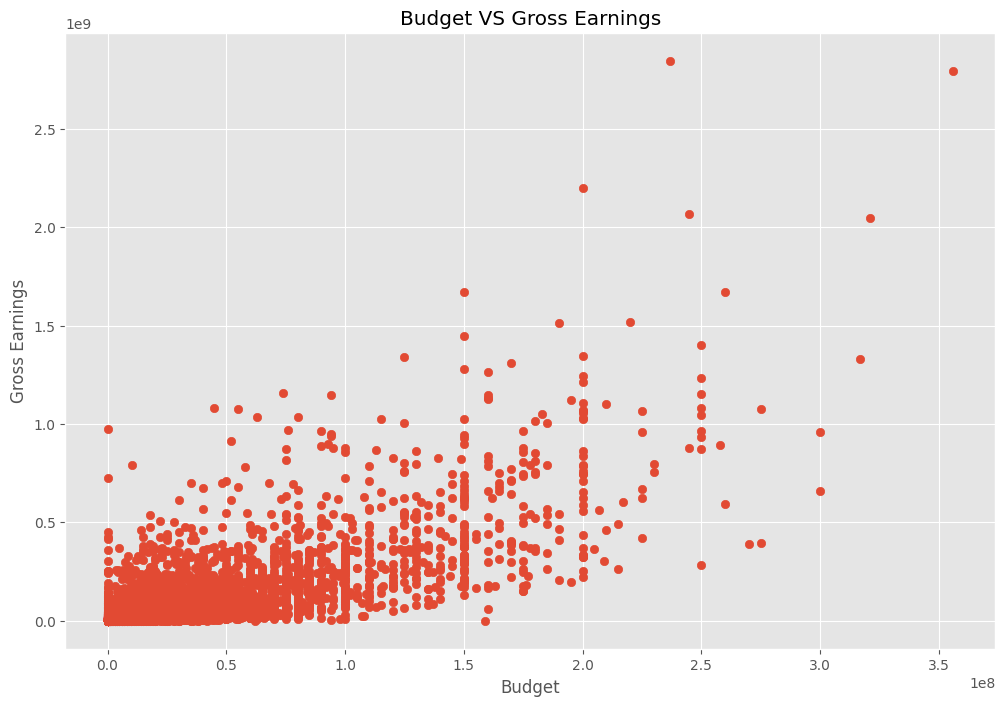

In [17]:
# Let's visualize correlation for Budget vs Gross with correlation : 0.750157, being the highest 
plt.scatter(x=mv_data['budget'], y = mv_data['gross'])
plt.title("Budget VS Gross Earnings")
plt.xlabel('Budget')
plt.ylabel("Gross Earnings")
plt.grid(True) 
plt.show()


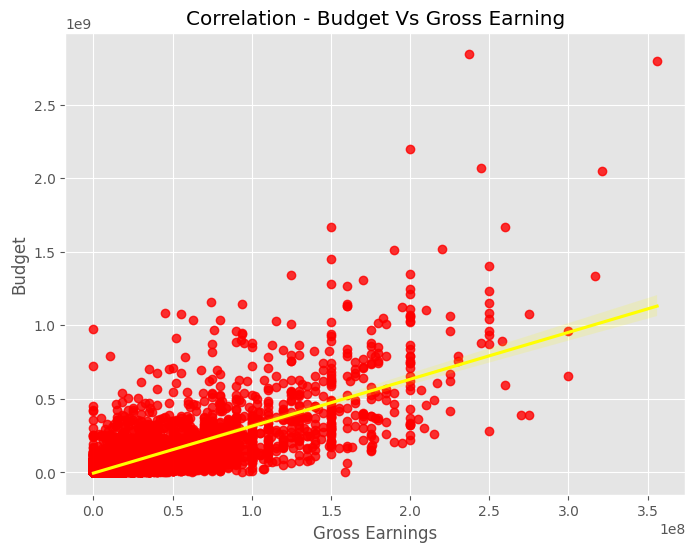

In [18]:
# Using Seaborn, plotting another visualization
  #Casting Values again as float for the Seaborn Visualization
mv_data['gross'] = mv_data['gross'].astype('float64')
mv_data['budget'] = mv_data['budget'].astype('float64')
plt.figure(figsize=(8,6))
snsplottt = sns.regplot(x='budget',y='gross', data= mv_data, scatter_kws = {"color": "red"},
            line_kws  = {"color": "yellow"}).set(title='Correlation - Budget Vs Gross Earning',
                                                 xlabel= 'Gross Earnings', ylabel = 'Budget')


As we can see from the above figure, when buget is increased, gross earnings are statiscally going to be greater as well.

In [19]:
mv_data.head()
mv_data_num = mv_data.copy(deep=True)

In [20]:
#Numberising all data to find Correaltion with non numberic fields

for col in mv_data_num.columns:
    if(mv_data_num[col].dtype == 'object' or 'string'):
        mv_data_num[col]  = mv_data_num[col].astype('category')
        mv_data_num[col] = mv_data_num[col].cat.codes    

In [21]:
mv_data_num.head()

name  rating  genre  year  released  score  votes  director  writer  star  \
0  6587       7      6     0      1706     65    915      2589    4015  1048   
1  5573       7      1     0      1493     39    394      2269    1633   328   
2  5142       5      0     0      1772     68    928      1111    2568  1746   
3   286       5      4     0      1493     58    549      1301    2001  2247   
4  1027       7      4     0      1544     54    437      1054     522   411   

   country  budget  gross  company  runtime  Release_Date  Release_Country  \
0       55     212   4975     2320       79          1510               56   
1       56      99   5275      732       37          1311               56   
2       56     208   7284     1541       57          1568               56   
3       56      88   5722     1813       21          1311               56   
4       56     116   4725     1778       31          1360               56   

   Percent_profit  
0            3301  
1            5235  
2            5381  
3            5356  
4            4823

In [22]:
#Finding Correlations in entire data

corr_mat = mv_data_num.corr(numeric_only=True)
corr_mat

name    rating     genre      year  released     score  \
name             1.000000 -0.008069  0.016355  0.011453 -0.011311  0.016598   
rating          -0.008069  1.000000  0.072423  0.008779  0.016613  0.003950   
genre            0.016355  0.072423  1.000000 -0.081261  0.029822  0.027592   
year             0.011453  0.008779 -0.081261  1.000000 -0.000695  0.094416   
released        -0.011311  0.016613  0.029822 -0.000695  1.000000  0.040699   
score            0.016598  0.003950  0.027592  0.094416  0.040699  1.000000   
votes            0.007497  0.074561 -0.185332  0.355072  0.002601  0.458517   
director         0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.010307   
writer           0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.021313   
star             0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.000542   
country         -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133644   
budget           0.015249 -0.013007 -0.295846  0.288039 -0.006878  0.007773   
gross            0.004800 -0.062343 -0.260990  0.313549 -0.047471  0.148174   
company          0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.003911   
runtime          0.009920  0.067150 -0.057637  0.125994  0.000641  0.406004   
Release_Date    -0.011223  0.015735  0.029039 -0.000832  0.999912  0.040826   
Release_Country -0.001968  0.023977 -0.091572 -0.089289 -0.044096 -0.092946   
Percent_profit  -0.013770 -0.084691  0.075220 -0.000315 -0.026660  0.182056   

                    votes  director    writer      star   country    budget  \
name             0.007497  0.009079  0.009081  0.006472 -0.010737  0.015249   
rating           0.074561  0.019483 -0.005921  0.013405  0.081244 -0.013007   
genre           -0.185332 -0.015258  0.006567 -0.005477 -0.037615 -0.295846   
year             0.355072 -0.020795 -0.008656 -0.027242 -0.070938  0.288039   
released         0.002601 -0.001478 -0.002404  0.015777 -0.020427 -0.006878   
score            0.458517  0.010307  0.021313 -0.000542 -0.133644  0.007773   
votes            1.000000  0.007427  0.007744 -0.020851  0.083126  0.539383   
director         0.007427  1.000000  0.299067  0.039234  0.017490  0.021450   
writer           0.007744  0.299067  1.000000  0.027245  0.015343 -0.002416   
star            -0.020851  0.039234  0.027245  1.000000 -0.012998 -0.016861   
country          0.083126  0.017490  0.015343 -0.012998  1.000000  0.205116   
budget           0.539383  0.021450 -0.002416 -0.016861  0.205116  1.000000   
gross            0.670375  0.011996  0.001881 -0.006306  0.172785  0.716984   
company          0.168983  0.004404  0.005646  0.012442  0.095548  0.208256   
runtime          0.337200  0.018408 -0.004417  0.009449 -0.076787  0.235097   
Release_Date     0.003794 -0.001275 -0.002421  0.015597 -0.020063 -0.005883   
Release_Country  0.103041  0.013331 -0.001201 -0.023540  0.297363  0.255348   
Percent_profit   0.070487 -0.036981 -0.008636  0.008094 -0.121177 -0.515006   

                    gross   company   runtime  Release_Date  Release_Country  \
name             0.004800  0.009211  0.009920     -0.011223        -0.001968   
rating          -0.062343 -0.032943  0.067150      0.015735         0.023977   
genre           -0.260990 -0.071067 -0.057637      0.029039        -0.091572   
year             0.313549 -0.010431  0.125994     -0.000832        -0.089289   
released        -0.047471 -0.010474  0.000641      0.999912        -0.044096   
score            0.148174  0.003911  0.406004      0.040826        -0.092946   
votes            0.670375  0.168983  0.337200      0.003794         0.103041   
director         0.011996  0.004404  0.018408     -0.001275         0.013331   
writer           0.001881  0.005646 -0.004417     -0.002421        -0.001201   
star            -0.006306  0.012442  0.009449      0.015597        -0.023540   
country          0.172785  0.095548 -0.076787     -0.020063         0.297363   
budget           0.716984  0.208256  0.235097     -0.0058

In [23]:
# Unstacking The Correlation Matrix

corr_pair = corr_mat.unstack()
sortedp = corr_pair.sort_values(ascending = False)

sortedp = sortedp[(sortedp>0.5)]
sortedp

name             name               1.000000
star             star               1.000000
year             year               1.000000
released         released           1.000000
score            score              1.000000
votes            votes              1.000000
director         director           1.000000
writer           writer             1.000000
country          country            1.000000
rating           rating             1.000000
budget           budget             1.000000
gross            gross              1.000000
company          company            1.000000
runtime          runtime            1.000000
Release_Date     Release_Date       1.000000
Release_Country  Release_Country    1.000000
genre            genre              1.000000
Percent_profit   Percent_profit     1.000000
Release_Date     released           0.999912
released         Release_Date       0.999912
gross            budget             0.716984
budget           gross              0.716984
gross     

[Text(0.5, 1.0, 'Correlation for Data')]

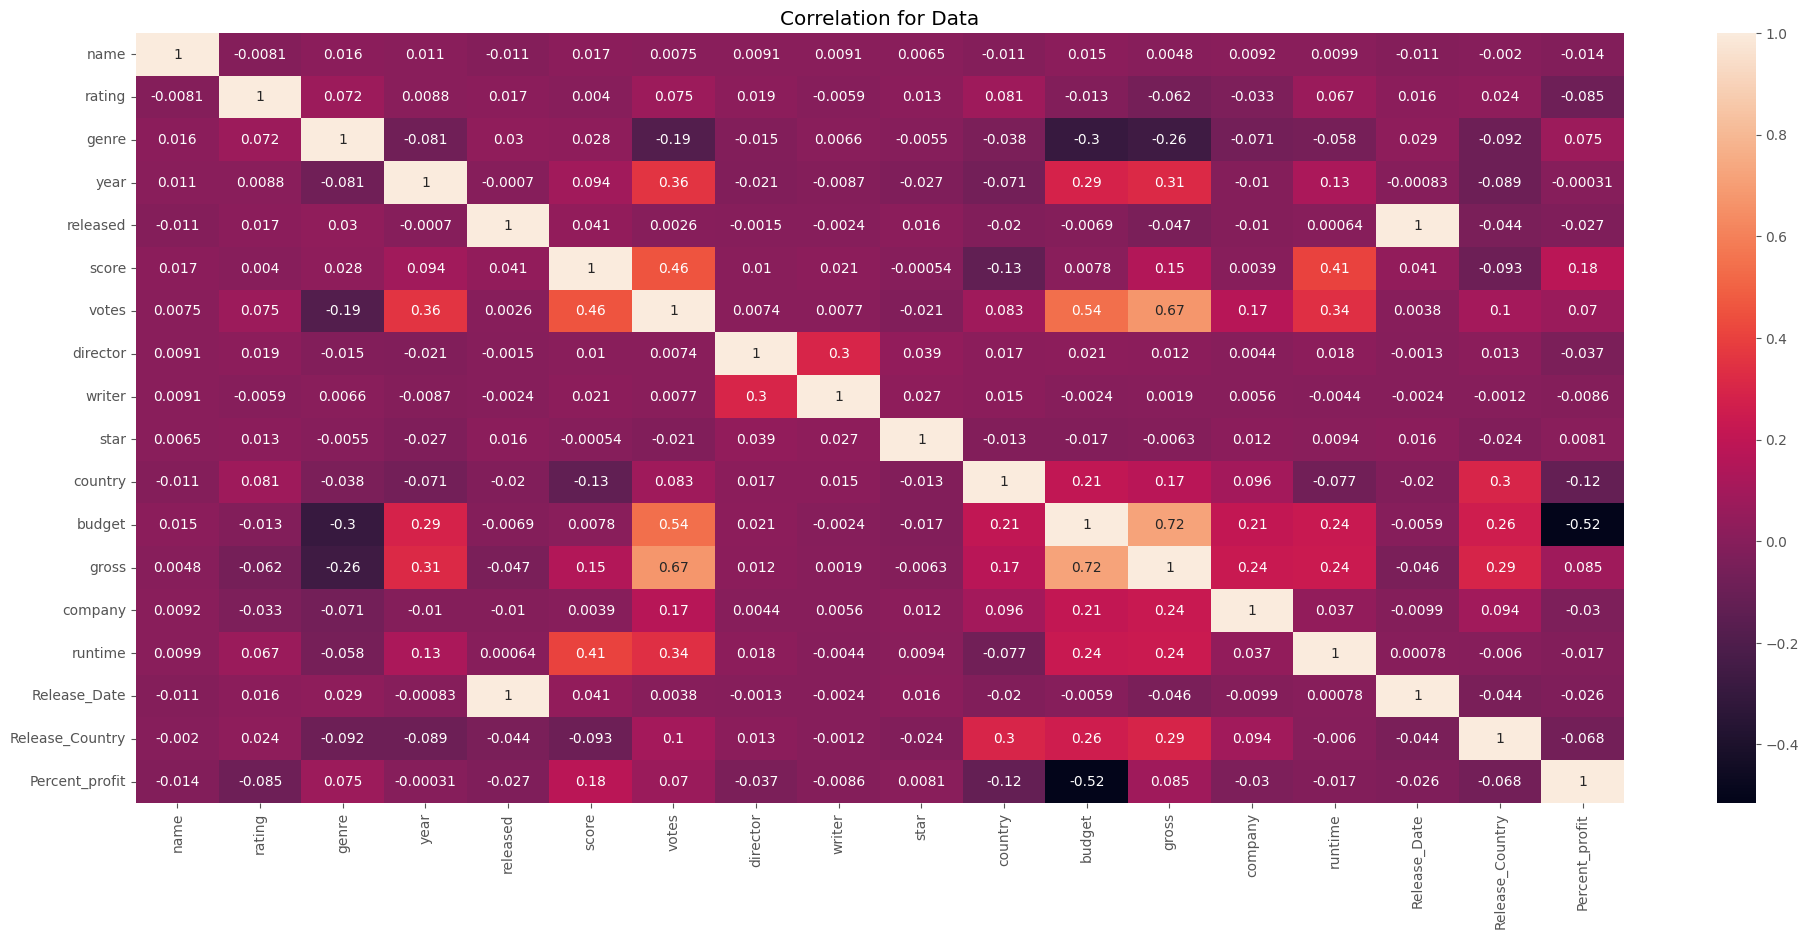

In [24]:
Corr_matrix  = mv_data_num.corr(numeric_only=True)
plt.figure(figsize=(24,10))
sns.heatmap(Corr_matrix,annot =  True).set(title ="Correlation for Data")

**Findings**

As per our analysis till now we can gather that corelation between : 

budget and gross is the highest at 0.716984 ~ 0.72 and,

votes  & gross at 0.670375 and,

budget & votes at 0.539383


Deduction: As we increase the budget, Gross earnings statistically, also increases. This means a higher quality product(here: Movie) is delivered to the audience and hence the votes also tend to go with the up trend 

In [25]:
# Sorting data on column 'gross' in descending order
mv_data1['Percent_profit'] = mv_data['Percent_profit'].round(2)
BestRevenuePer  = mv_data1.sort_values(by=['Percent_profit'], inplace = False, ascending = False)
BestRevenuePer = BestRevenuePer.head(10)

BestRevenuePer['Percent_profit'] = (BestRevenuePer['Percent_profit']*0.0001).round(2)

/tmp/ipykernel_32/2738145561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_data1['Percent_profit'] = mv_data['Percent_profit'].round(2)


[Text(0, 0, '128.9'),
 Text(0, 0, '41.44'),
 Text(0, 0, '4.3'),
 Text(0, 0, '2.92'),
 Text(0, 0, '1.4'),
 Text(0, 0, '1.17'),
 Text(0, 0, '1.15'),
 Text(0, 0, '1.12'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.09')]

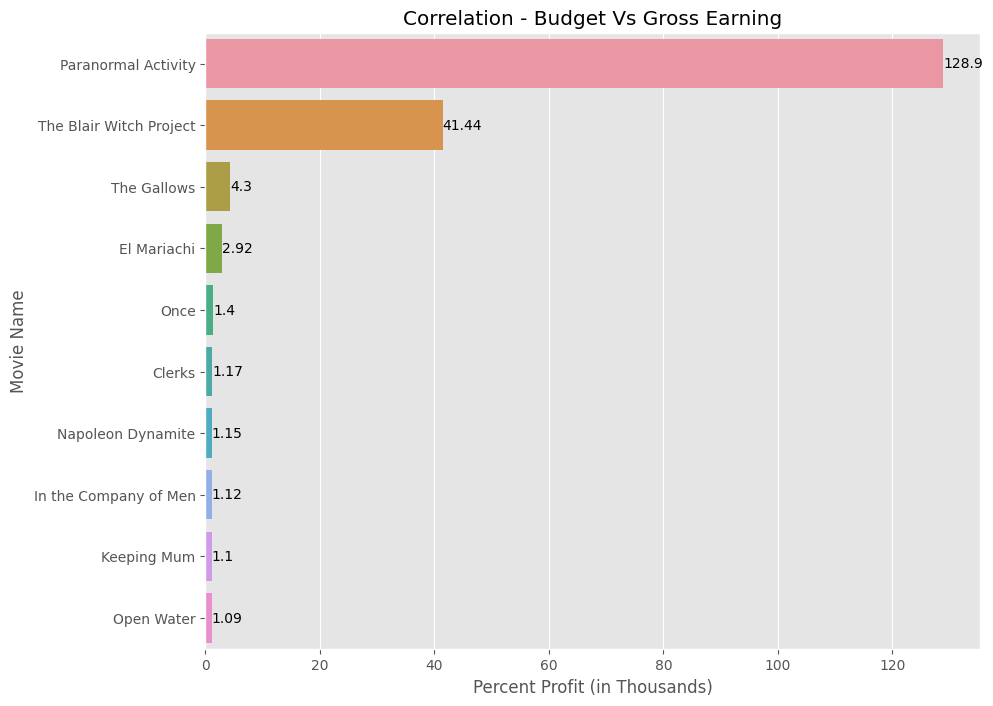

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="Percent_profit", y="name", data=BestRevenuePer).set(title='Correlation - Budget Vs Gross Earning',xlabel= 'Percent Profit (in Thousands)', ylabel = 'Movie Name')
# new helper method to auto-label bars
ax.bar_label(ax.containers[0])

In [27]:
mv_data.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime    Release_Date Release_Country  \
0   46998772.0        Warner Bros.    146.0  June 13, 1980    United States   
1   58853106.0   Columbia Pictures    104.0   July 2, 1980    United States   
2  538375067.0           Lucasfilm    124.0  June 20, 1980    United States   
3   83453539.0  Paramount Pictures     88.0   July 2, 1980    United States   
4   39846344.0      Orion Pictures     98.0  July 25, 1980    United States   

   Percent_profit  
0      247.361958  
1       1307.8468  
2     2990.972594  
3     2384.386829  
4      664.105733

[Text(0, 0, '128.9'),
 Text(0, 0, '41.44'),
 Text(0, 0, '4.3'),
 Text(0, 0, '2.92'),
 Text(0, 0, '1.4'),
 Text(0, 0, '1.17'),
 Text(0, 0, '1.15'),
 Text(0, 0, '1.12'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.09')]

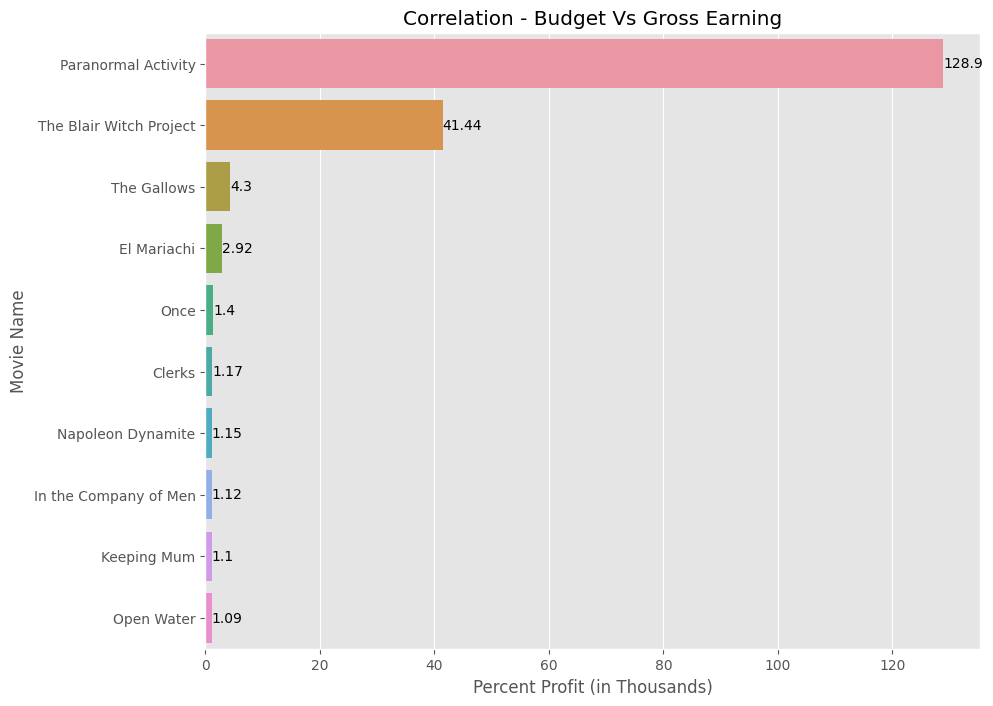

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="Percent_profit", y="name", data=BestRevenuePer).set(title='Correlation - Budget Vs Gross Earning',xlabel= 'Percent Profit (in Thousands)', ylabel = 'Movie Name')
# new helper method to auto-label bars
ax.bar_label(ax.containers[0])

In [29]:
mv_data_aggr = mv_data.copy(deep = True)

In [42]:
mv_data.head(2)

name rating      genre  year                       released  \
0      The Shining      R      Drama  1980  June 13, 1980 (United States)   
1  The Blue Lagoon      R  Adventure  1980   July 2, 1980 (United States)   

   score   votes         director                   writer            star  \
0    8.4  927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8   65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   

          country      budget       gross            company  runtime  \
0  United Kingdom  19000000.0  46998772.0       Warner Bros.    146.0   
1   United States   4500000.0  58853106.0  Columbia Pictures    104.0   

     Release_Date Release_Country  Percent_profit  
0  June 13, 1980    United States      247.361958  
1   July 2, 1980    United States       1307.8468

In [44]:
# Average Score of each Category

mean_score = mv_data.groupby(['genre']).agg(score_mean=('score', 'mean'))
mean_score = mean_score.reset_index()

In [47]:
mean_score

genre  score_mean
0      Action    6.199179
1   Adventure    6.291569
2   Animation    6.769231
3   Biography    7.030926
4      Comedy    6.193987
5       Crime    6.671506
6       Drama    6.684848
7      Family    6.363636
8     Fantasy    6.006818
9     History    8.300000
10     Horror    5.750621
11      Music    7.200000
12    Musical    8.050000
13    Mystery    6.665000
14    Romance    6.410000
15     Sci-Fi    6.210000
16      Sport    5.900000
17   Thriller    5.912500
18    Western    5.666667

<Axes: xlabel='genre'>

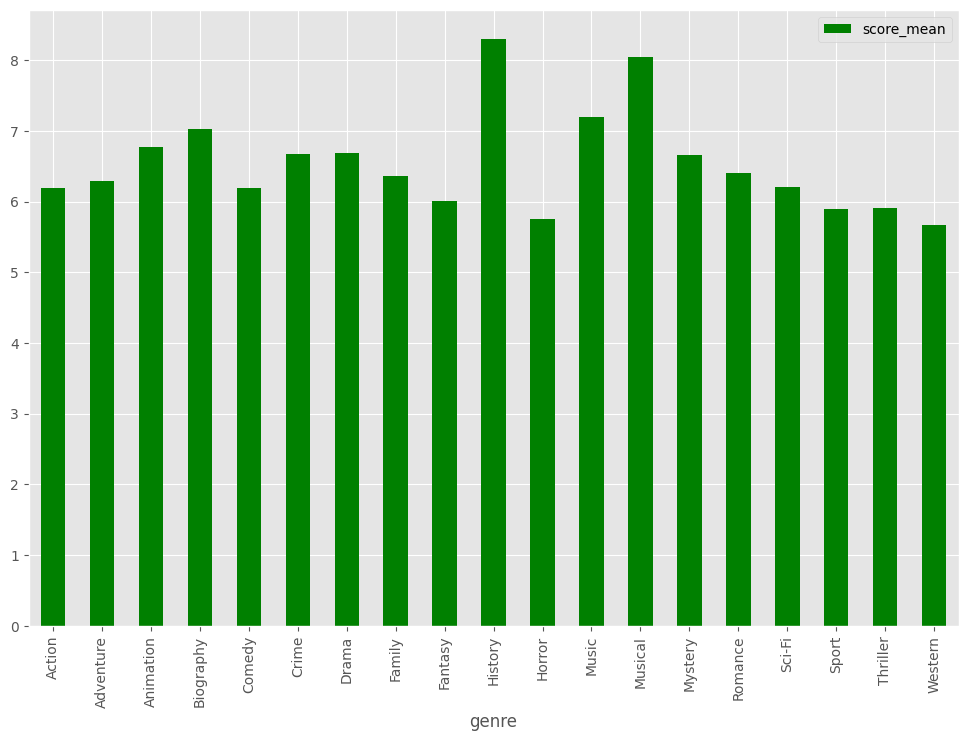

In [33]:
mean_score.plot.bar(label=True, color = 'Green')

In [34]:
bestgross = mv_data.sort_values(by=['gross'], inplace = False, ascending = False)
bestgross = bestgross.head(10)
bestgross

name rating      genre  year  \
5445                                      Avatar  PG-13     Action  2009   
7445                           Avengers: Endgame  PG-13     Action  2019   
3045                                     Titanic  PG-13      Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   
6646                                   Furious 7  PG-13     Action  2015   
7494                                   Frozen II     PG  Animation  2019   

                               released  score    votes         director  \
5445  December 18, 2009 (United States)    7.8  1100000    James Cameron   
7445     April 26, 2019 (United States)    8.4   903000    Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000    James Cameron   
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000      Joss Whedon   
6646      April 3, 2015 (United States)    7.1   370000        James Wan   
7494  November 22, 2019 (United States)    6.8   148000       Chris Buck   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
7480      Jeff Nathanson      Donald Glover  United States  260000000.0   
6653          Rick Jaffa        Chris Pratt  United States  150000000.0   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000.0   
6646        Chris Morgan         Vin Diesel  United States  190000000.0   
7494        Jennifer Lee       Kristen Bell  United States  150000000.0   

             gross                        company  runtime  \
5445  2.847246e+09          Twentieth Century Fox    162.0   
7445  2.797501e+09                 Marvel Studios    181.0   
3045  2.201647e+09          Twentieth Century Fox    194.0   
6663  2.069522e+09                      Lucasfilm    138.0   
7244  2.048360e+09                 Marvel Studios    149.0   
7480  1.670728e+09           Walt Disney Pictures    118.0   
6653  1.670516e+09             Universal Pictures    124.0   
6043  1.518816e+09                 Marvel Studios    143.0   
6646  1.515341e+09             Universal Pictures    137.0   
7494  1.450027e+09  Walt Disney Animation Studios    103.0   

            Release_Date Release_Country  Percent_profit  
5445  December 18, 2009    United States     1201.369706  
7445     April 26, 2019    United States       785.81498  
3045  December 19, 1997    United States     1100.823632  
6663  December 18, 2015    United States      844.702735  
7244     April 27, 2018    United States      638.118303  
7480      July 19, 2019    United States      642.587531  
6653      June 12, 2015    United States     1113.677629  
6043        May 4, 2012    United States      690.370689  
6646      April 3, 2015    United States      797.548105  
7494  November 22, 2019    United States      966.684622

In [35]:
#Exporting Data for Tableau/Power BI visualization
mv_data1.to_csv('BestRevenuePer.csv', encoding='utf-8')
from IPython.display import FileLink
FileLink(r'BestRevenuePer.csv')

/kaggle/working/BestRevenuePer.csv

In [48]:
BestRevenuePer.to_excel('BestRevenuePer.xlsx', index=False)
bestgross.to_excel('bestgross.xlsx', index=False)
mean_score.to_excel('meanscore.xlsx', index=False)